In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn import *


In [3]:
# Load Titanic dataset (can be downloaded from Kaggle or use this GitHub-hosted CSV)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Impute missing values:
# - 'Age' ➜ fill with median
# - 'Embarked' ➜ fill with mode (most frequent value)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop rows where target variable 'Survived' is missing (shouldn't be many)
df.dropna(subset=['Survived'], inplace=True)

# Check again after imputation
missing_values_after = df.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)


Missing values before imputation:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing values after imputation:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [7]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply IQR method to remove outliers in the 'Age' and 'Fare' columns
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Display the shape of the dataset after removing outliers
print("\nDataset shape after removing outliers:", df.shape)



Dataset shape after removing outliers: (638, 12)


In [8]:
# One-Hot Encoding for categorical variables 'Sex' and 'Embarked'
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,True,True,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,False,False,True


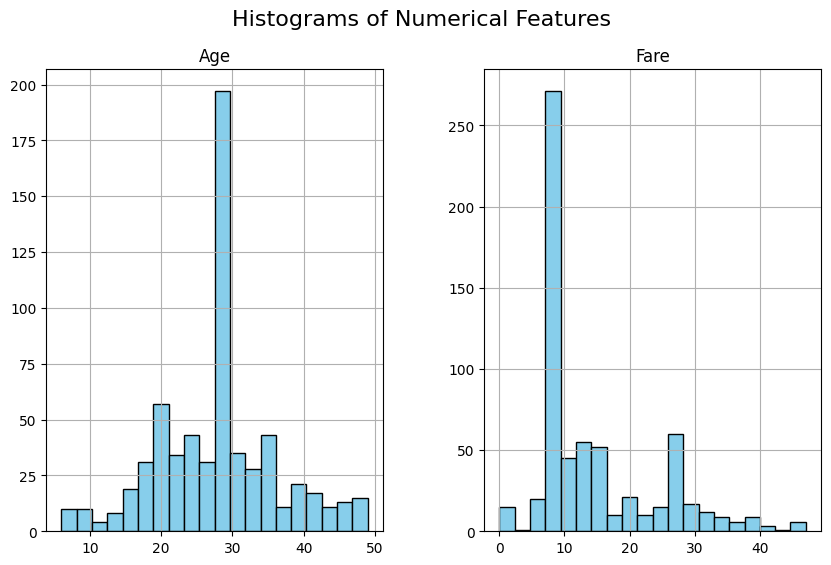

In [9]:
# Plot histograms for numerical features
df_encoded[['Age', 'Fare']].hist(bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


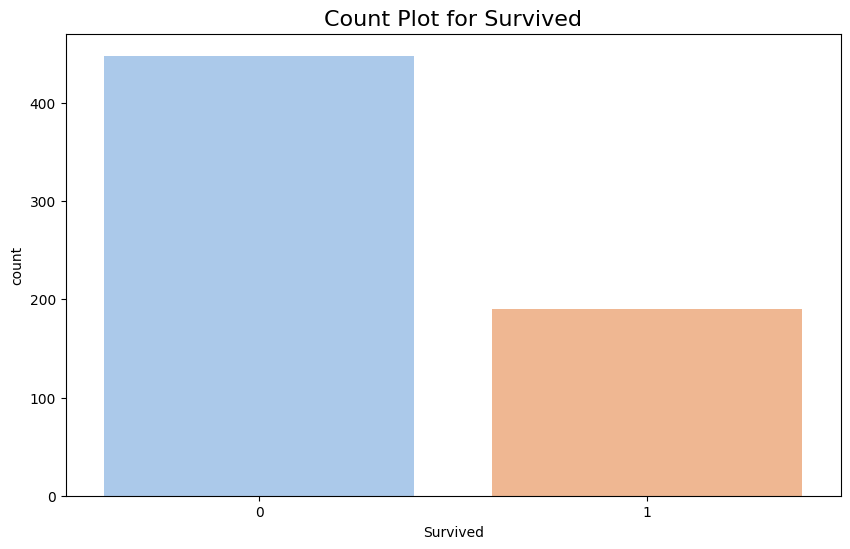

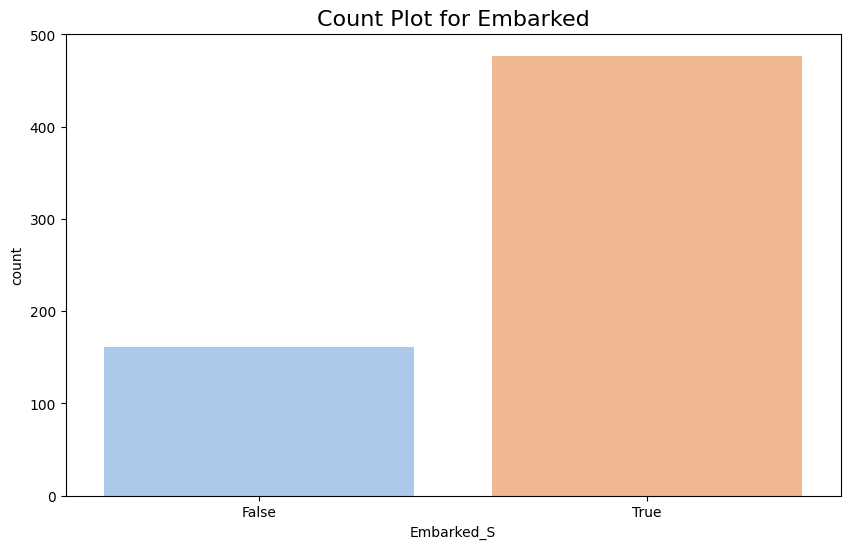

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count plot for 'Survived' (target variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='Survived', hue='Survived', palette='pastel', legend=False)
plt.title('Count Plot for Survived', fontsize=16)
plt.show()

# Plot count plot for 'Embarked' (categorical feature)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='Embarked_S', hue='Embarked_S', palette='pastel', legend=False)
plt.title('Count Plot for Embarked', fontsize=16)
plt.show()
